# 第三章总结 分类问题

## 1. 准备数据

* 准备数据
 * 数据集初探
 * 不用清洗，不用特征工程
 * 分离测试集

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [67]:
import pandas as pd
DATA_PATH = 'datasets/MNIST/'
def load_data(datapath=DATA_PATH):
    train_set = pd.read_csv(datapath+'mnist_train.csv', header=None, usecols=list(range(1,785)))
    train_label = pd.read_csv(datapath+'mnist_train.csv', header=None, usecols=[0])
    test_set = pd.read_csv(datapath+'mnist_test.csv', header=None, usecols=list(range(1,785)))
    test_label = pd.read_csv(datapath+'mnist_test.csv', header=None, usecols=[0])
    return train_set, test_set, train_label, test_label
train_set, test_set, train_label, test_label = load_data()

In [68]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 1 to 784
dtypes: int64(784)
memory usage: 358.9 MB


In [48]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       60000 non-null  int64
dtypes: int64(1)
memory usage: 468.9 KB


In [49]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 1 to 784
dtypes: int64(784)
memory usage: 59.8 MB


In [51]:
test_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [52]:
train_set.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
train_set.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [73]:
X_train = train_set.values
y_train = train_label.values
X_test = test_set.values
y_test = test_label.values
X_train.shape

(60000, 784)

(-0.5, 27.5, 27.5, -0.5)

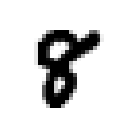

In [103]:
some_digit = X_train[54787].reshape(28,28)
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(2,2))
plt.imshow(some_digit, cmap=matplotlib.cm.binary)
plt.axis("off")


In [89]:
y_train[54787]

array([8])

## 2. 选择模型、训练模型（二元分类器）

* 分类问题的适用模型：
 * SGD 随机梯度下降（Stochastic Gredient Dscending)
 * Decistion Treee 决定树

## 3. 对模型进行评估（二元分类器）

* 准确度 accuracy（不是很有效，尤其对有偏斜的数据）
* 混淆矩阵 confusion matrix （A实例被识别为B的次数）
* 精度（正类预测的准确率）
* 召回率、灵敏度、真正类率（检测到的正类比率）
* F1分数（精度与召回率的谐波平均），给予较小的值更大的权重
* 在召回率和精度之间平衡，以选择阀值：
 * 精度（召回率）-阀值曲线
 * 精度-召回率曲线（PR曲线）
* 比较多个模型的表现：
 * ROC曲线（受试者工作特征曲线、真正类率V.S.假正类率（1-特异度））
 * ROC AUC（ROC的曲线下面积）